# Crude Initial Mass Function


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Import Upper Sco data

In [2]:
usco = np.genfromtxt('/Users/grefe950/evolve/data/usco/tmp.txt')

Load standard and magnetic isochrones for corresponding ages. Assume standard models is 5 Myr, although that is clearly not correct for higher mass stars.

In [3]:
std_iso = np.genfromtxt('/Users/grefe950/evolve/dmestar/iso/gs98/p000/a0/amlt1884/dmestar_00005.0myr_z+0.00_a+0.00_phx.iso')
mag_iso = np.genfromtxt('/Users/grefe950/evolve/data/beq/models/GS98/dmestar_00010.0myr_z+0.00_a+0.00_phx_magBeq.iso')

Import interpolation routines.

In [4]:
from scipy.interpolate import interp1d

Trim data to appropriate temperature domain.

In [5]:
usco = np.array([star for star in usco if min(std_iso[:,1]) <= star[2] <= max(mag_iso[:,1])])

Setup iterpolation curves.

In [6]:
std_curve = interp1d(std_iso[:,1], std_iso[:,0], kind='cubic')
mag_curve = interp1d(mag_iso[:,1], mag_iso[:,0], kind='cubic')

Get masses.

In [7]:
usco_mass_std = std_curve(usco[:,2])
usco_mass_mag = mag_curve(usco[:,2])

Plot a quick histogram of the masses.

(array([ 29.,  26.,  27.,  22.,  17.,  22.,   6.,  20.,  24.,   5.,   1.,
          2.,   7.,  10.,  10.,   8.,   9.,  16.,  10.,  18.]),
 array([ 0.14494808,  0.22262385,  0.30029963,  0.3779754 ,  0.45565118,
         0.53332695,  0.61100272,  0.6886785 ,  0.76635427,  0.84403004,
         0.92170582,  0.99938159,  1.07705736,  1.15473314,  1.23240891,
         1.31008468,  1.38776046,  1.46543623,  1.543112  ,  1.62078778,
         1.69846355]),
 <a list of 20 Patch objects>)

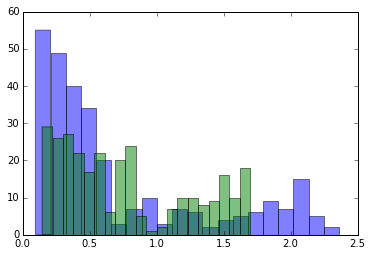

In [8]:
plt.hist(usco_mass_std, bins=20, alpha=0.5)
plt.hist(usco_mass_mag, bins=20, alpha=0.5)

Best to do a KDE.

In [9]:
from scipy.stats import gaussian_kde as GaussKDE

In [10]:
usco_std_smooth = GaussKDE(usco_mass_std, bw_method='silverman')
usco_mag_smooth = GaussKDE(usco_mass_mag, bw_method='silverman')

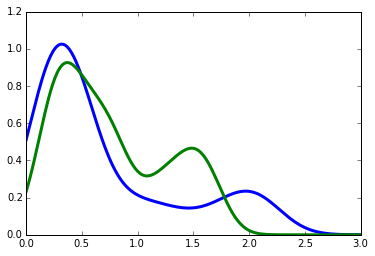

In [11]:
masses = np.arange(0.0, 3.0, 0.01)
plt.plot(masses, usco_std_smooth.pdf(masses), '-', lw=3)
plt.plot(masses, usco_mag_smooth.pdf(masses), '-', lw=3)

## Reverse Engineering: Sample Preibisch et al. 2002 IMF